# **Time Series and Finance**

In [4]:
import itertools
import pandas as pd
import numpy as np
from random import gauss
from arch import arch_model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

from scipy.stats import shapiro, probplot

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Setup
data = 'data/'

class CFG:
    img_dim1 = 12
    img_dim2 = 7
    fontsize = 8
    marker = 2
    lines = 1.5

# plt.rcParams.keys() to list params
# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2),
                     'font.size': (CFG.fontsize),
                     'lines.markersize': (CFG.marker),
                     'lines.linewidth': (CFG.lines)})   

## Volatility Clustering

Continuing with the `Tata Steel` dataset from the previous NB in the series, let's model one of the most challenging aspects of financial data i.e. **volatility**, especially as it pertains to stocks and financial markets. 

The subject of finanical volatility is an entire field of study for obvious reasons. But, for starters, we can plot the volume weighted average price of the aforementioned stock and observe the oscillations over a relatively long time horizon. Here large oscillations are indicative of high volatility and periods of turbulance.

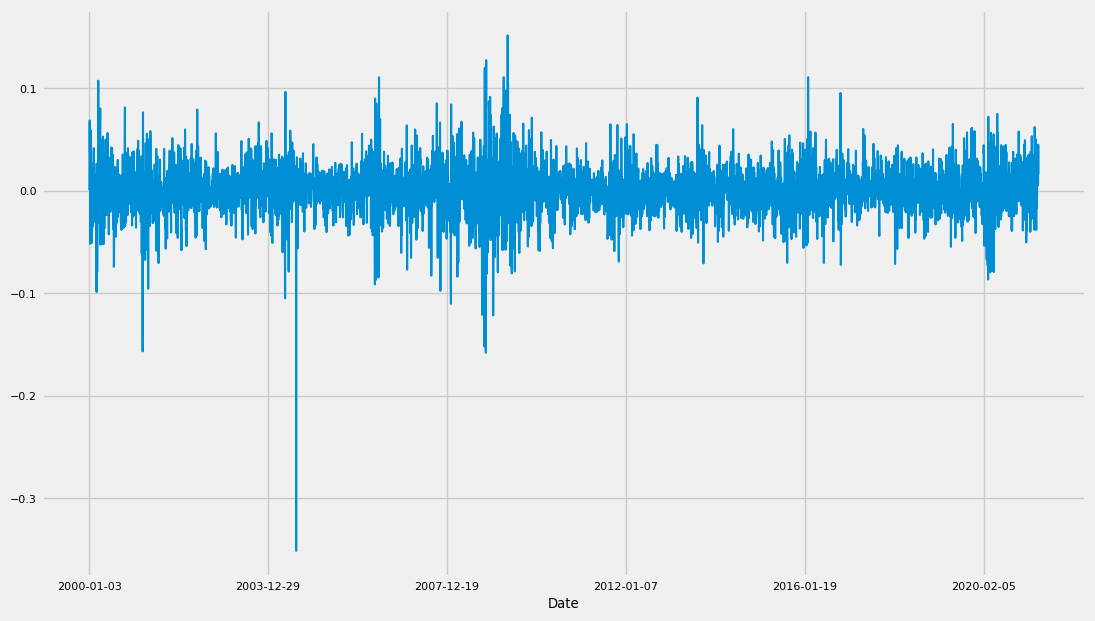

In [11]:
stock = 'TATASTEEL'
df = pd.read_csv('data/nifty50-stocks/' + stock + '.csv')
df.set_index('Date', drop=False, inplace=True)

df.VWAP.pct_change().plot();

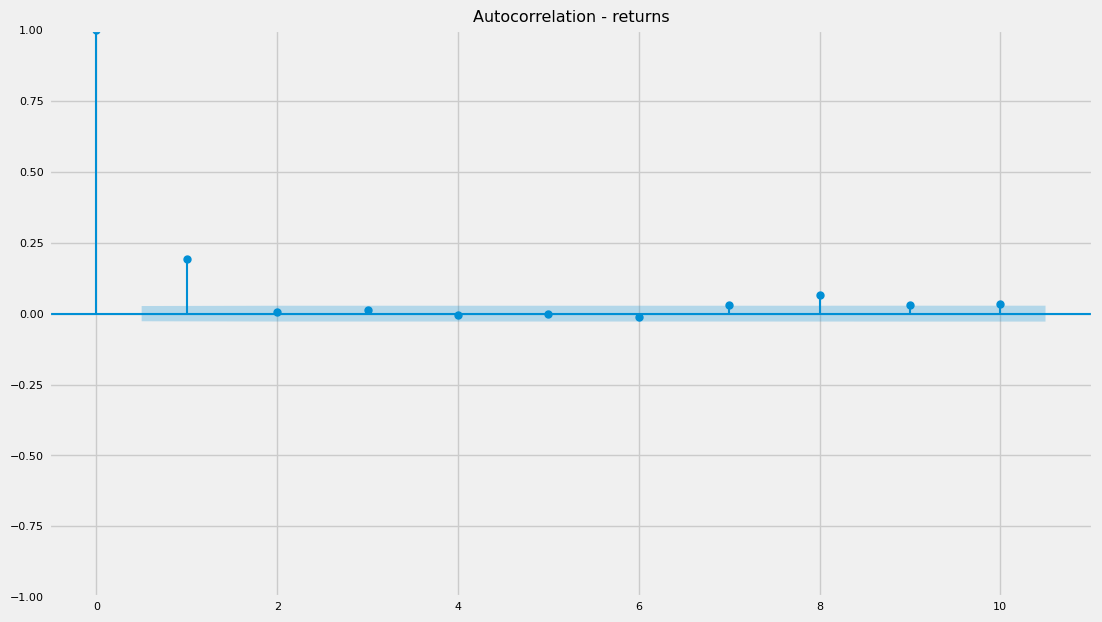

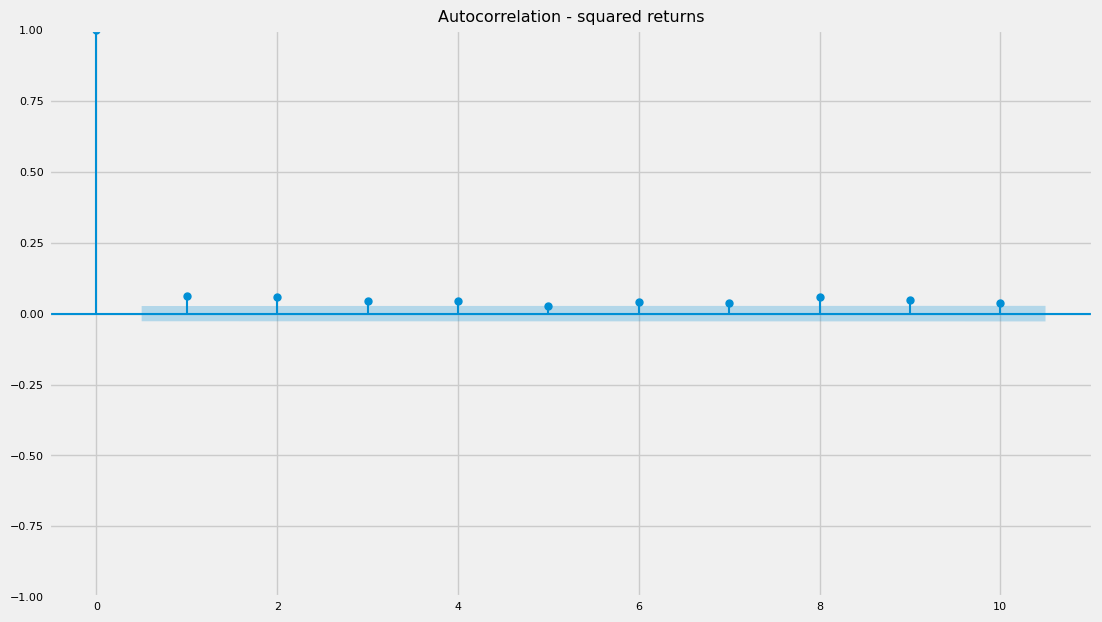

In [14]:
# Dropping nulls and plotting acf for returns and squared returns
df1 = np.log1p(df.VWAP).diff().dropna()

plot_acf(df1, lags=10, title='Autocorrelation - returns'); print()
plot_acf(df1**2, lags=10, title='Autocorrelation - squared returns'); print()

- Autocorr. on `returns` helps us determine if there is a linear dependance in the actual values of the series.
- Doing the same for `squared returns` gives a diagnostic view into serial dependance.

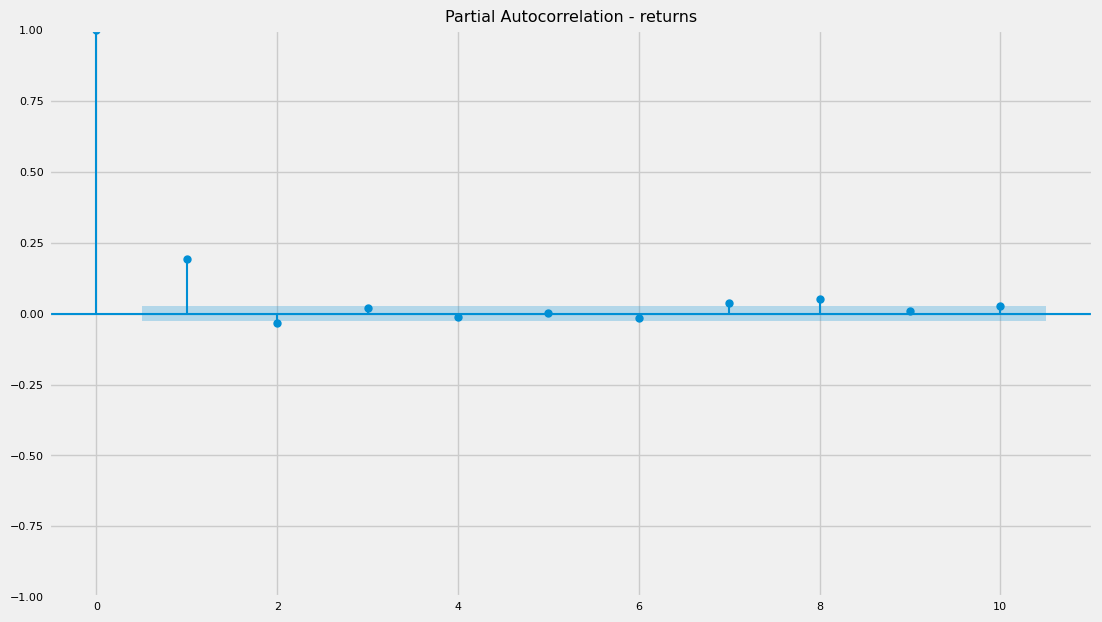

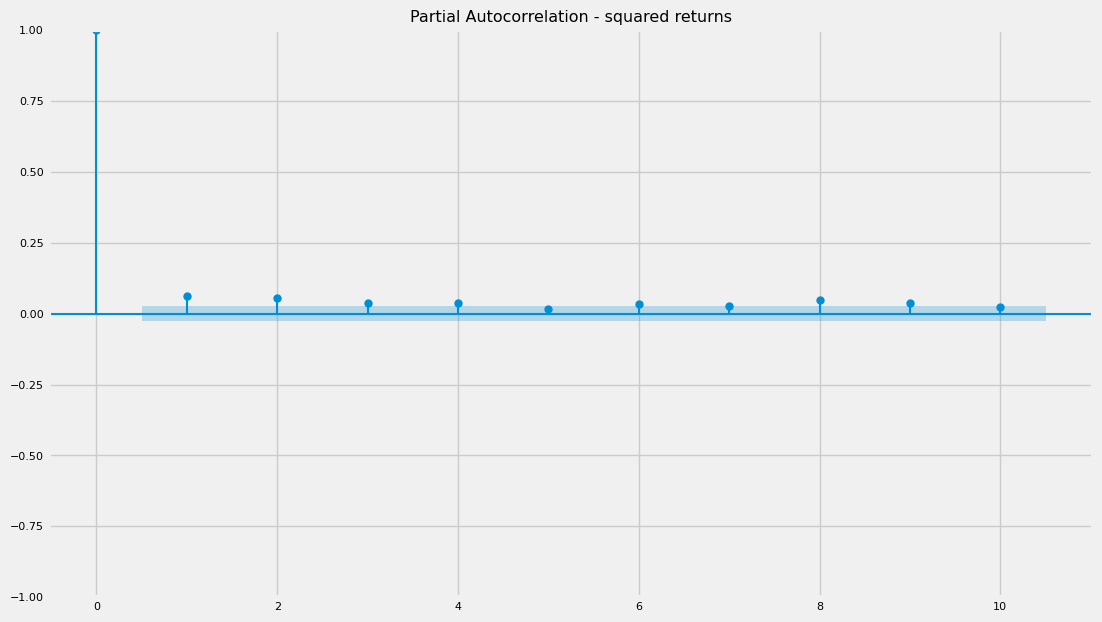

In [15]:
# Now plotting pacf
plot_pacf(df1, lags=10, title='Partial Autocorrelation - returns'); print()
plot_pacf(df1**2, lags=10, title='Partial Autocorrelation - squared returns'); print()

So, we've established that the VWAP for the stock has serial dependance.